##  Decision tree - Padmaja 19BAI1107 

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The data

**Reading the csv file heart_decision_tree( dataset taken from kaggle : Heart Disease UCI )**

This is a heart disease classification datset. It has 14 attributes. The target attribute tells us if a person has a heart condition. 0 refers to no heartcondition where as 1 refers to presence of heart disease.

In [3]:
df1 = pd.read_csv('heart decision tree.csv')

In [4]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df1.shape

(303, 14)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Inference : This dataset has 303 rows and 14 columns**

# Exploratory Data Analysis

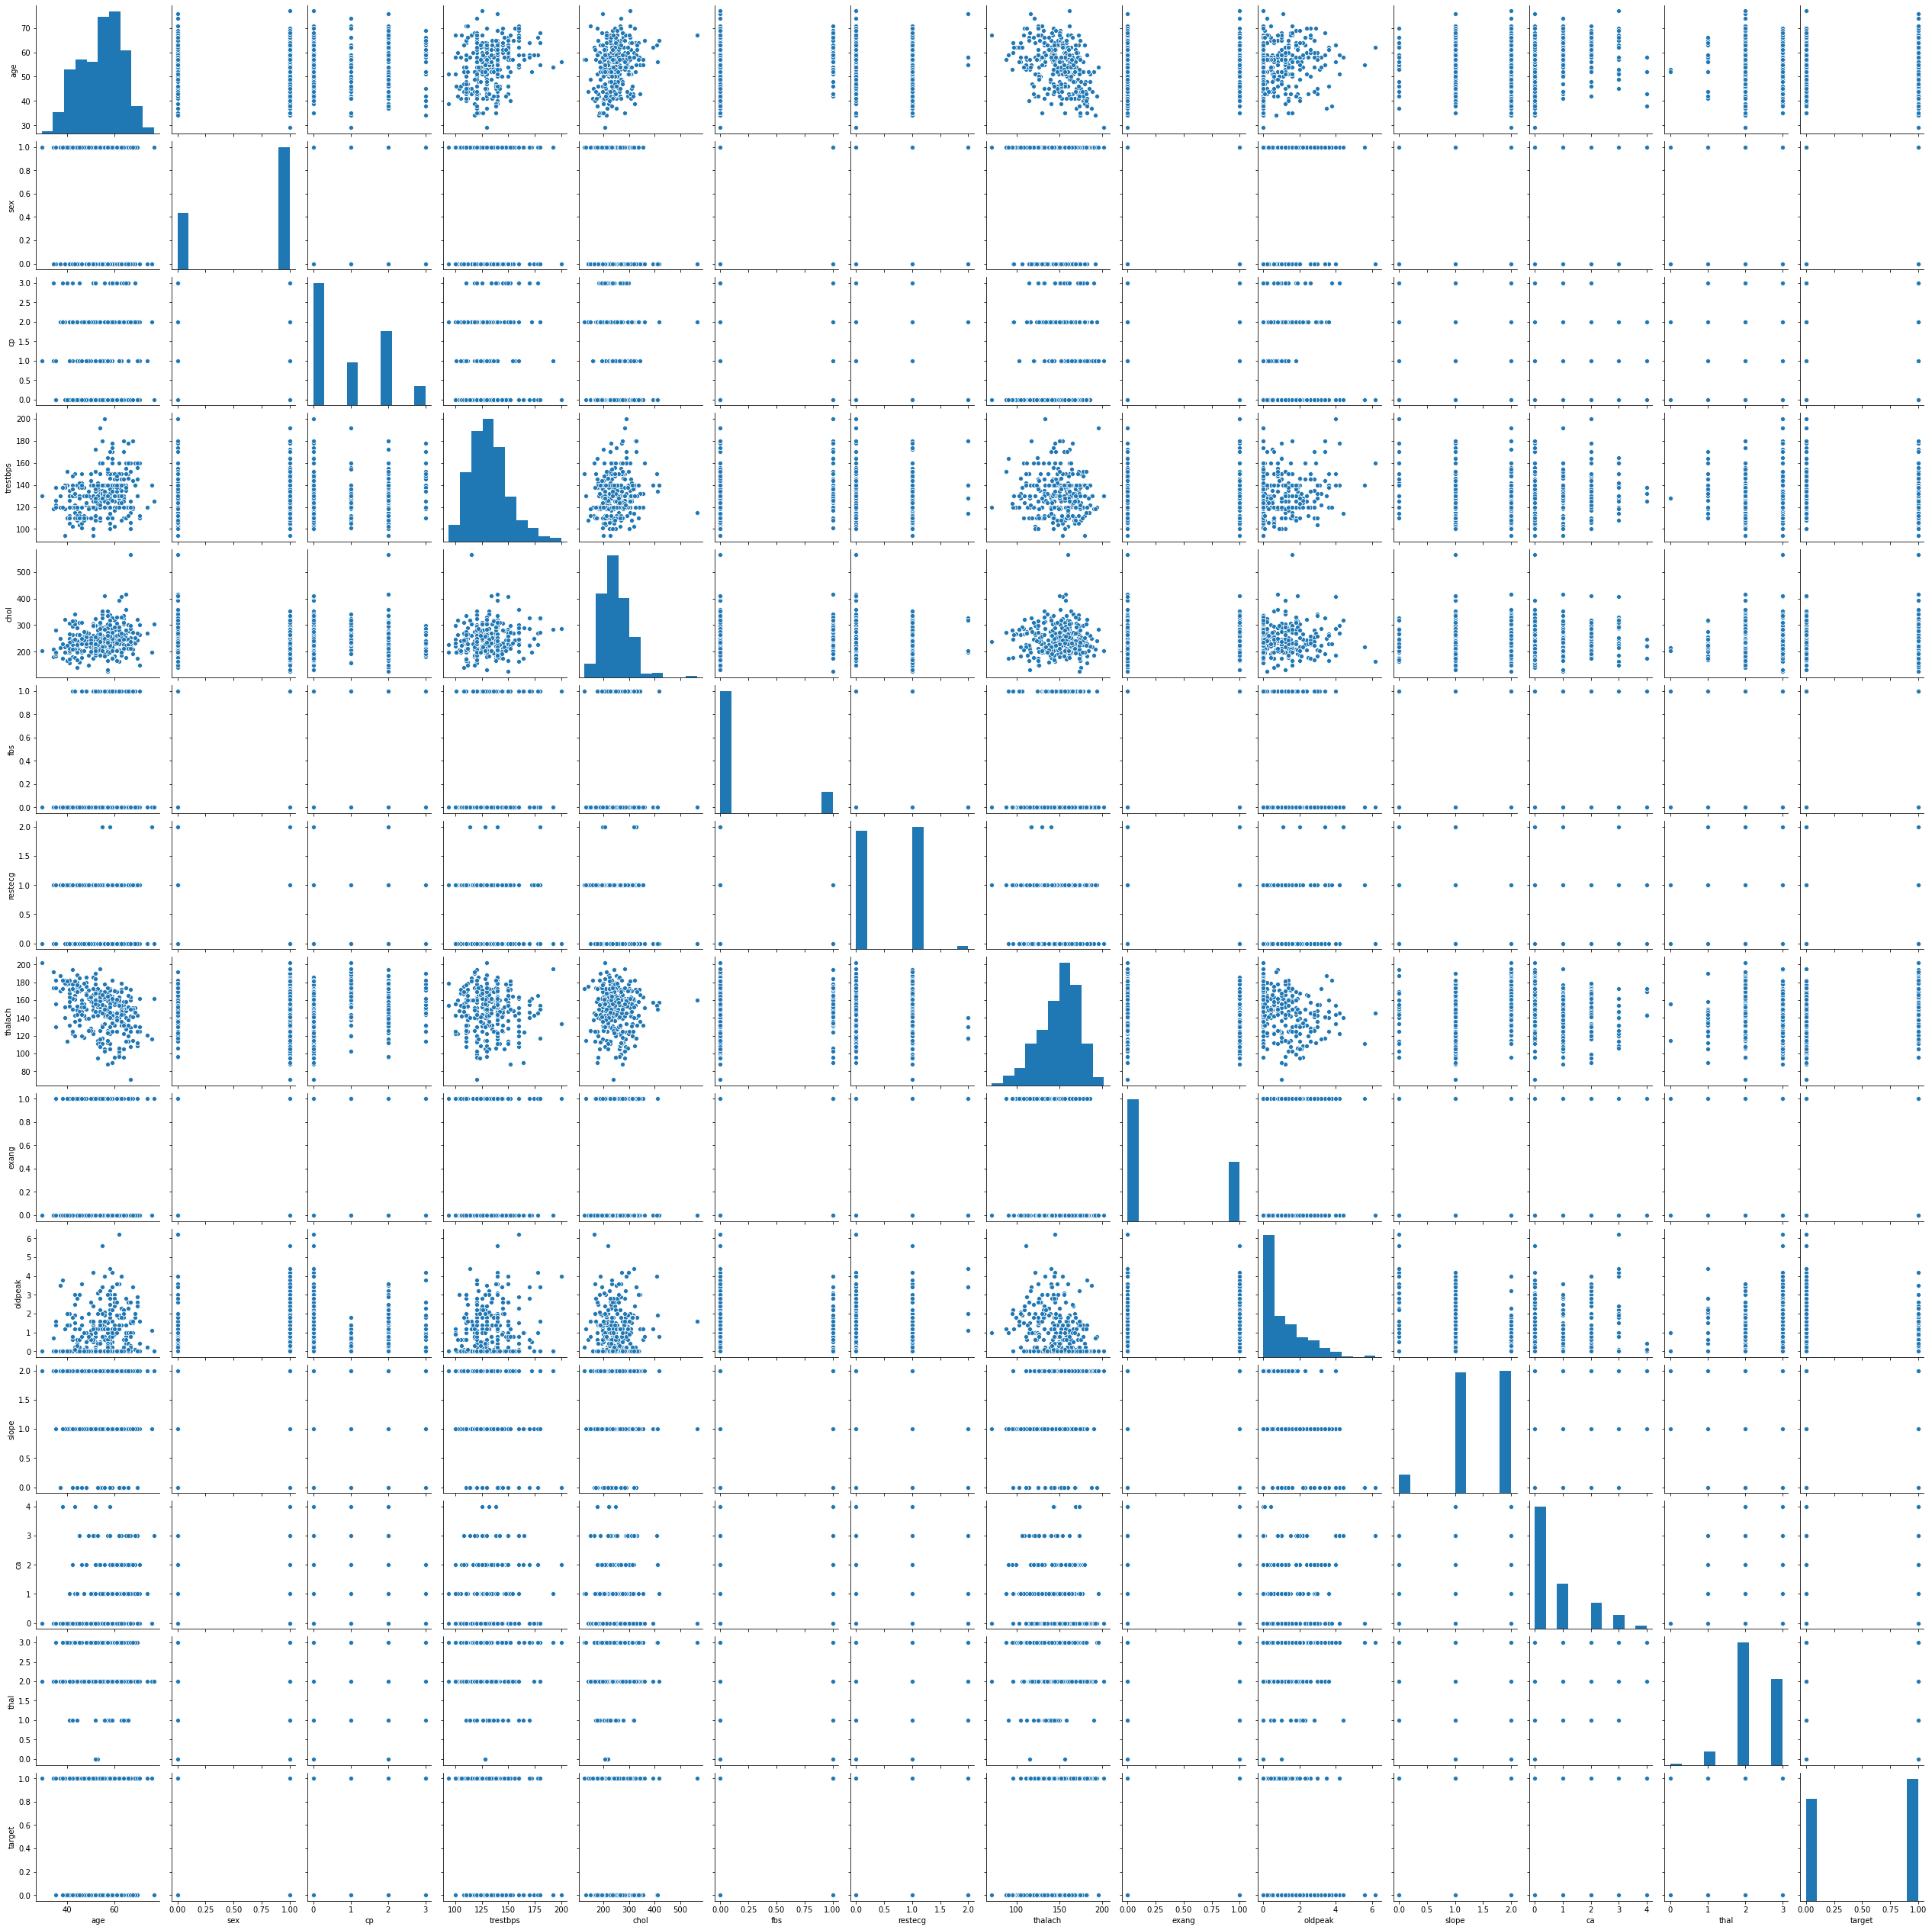

In [23]:
sns.pairplot(df1)

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('target',axis=1), 
                                                    df1['target'], test_size=0.30, 
                                                    random_state=101)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Prediction and evaluation

In [10]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.70      0.81        44
           1       0.78      0.96      0.86        47

    accuracy                           0.84        91
   macro avg       0.86      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



**Inference : From the above classification report we can check presicion, recall and f1 score.This model has a good precision od 0.9 for not diseased and 0.7 for diseased.The accuracy of this model is about 84%.**

In [14]:
print(confusion_matrix(y_test,predictions))

[[31 13]
 [ 2 45]]


**Inference : From the confusion matrix we can observe that out of the total of 91 predictions the model has given correct predictions 76(31+45) times and wrong predictions 16 times(13+2).**

# Tree visualisation

In [21]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Dell\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    openssl-1.1.1j             |       h2bbff1b_0         4.8 MB
    ------------------------------------------------------------
                                           Total:        34.1 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  openssl                                 1.1.1i-h2bbff1b_0 --> 1.1.1j-h2bbff1b_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |        

In [24]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot



features = list(df1.columns[1:])
features

['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

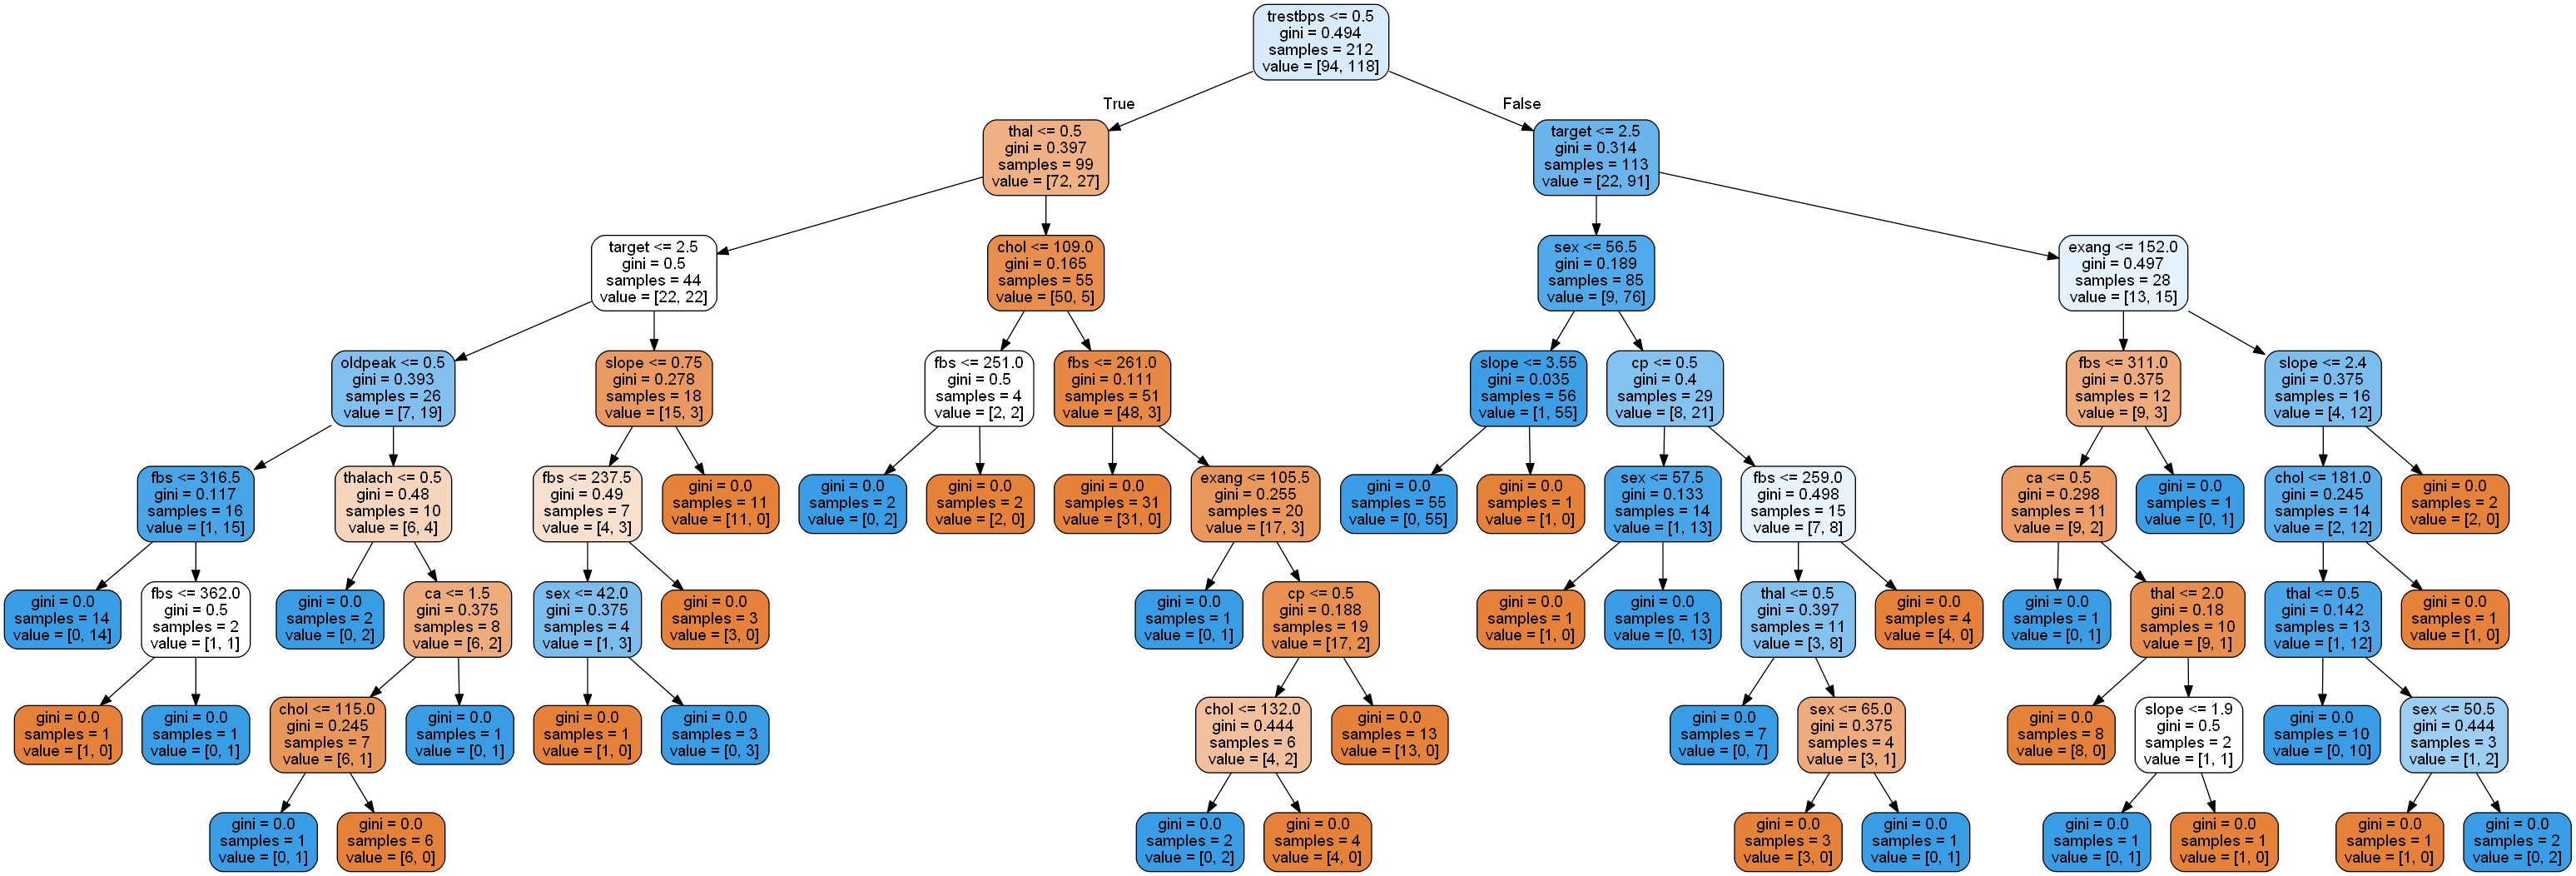

In [22]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)



graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())